In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
x = np.linspace(1e-1,1e4,100)
y = np.linspace
plt.rcParams.update({'font.size': 18})

In [ ]:
import matplotlib
matplotlib.font_manager._rebuild()

In [3]:
x1 = np.random.normal(loc=0.02,scale=0.1,size=100)
y1 = np.random.normal(loc=0.02,scale=0.01,size=100)

x2 = np.random.normal(loc=0.35,scale=0.1,size=200)
y2 = np.random.normal(loc=0.01,scale=0.02,size=200)

x3 = np.random.normal(loc=0.1,scale=0.06,size=500)
y3 = np.random.normal(loc=0.4,scale=0.07,size=500)

mask1 = (x1>0) * (y1>0)
x1 = x1[mask1]
y1 = y1[mask1]

mask2 = (x2>0) * (y2>0)
x2 = x2[mask2]
y2 = y2[mask2]
y4 = x2+y2

mask3 = (x3>0) * (y3>0)
x3 = x3[mask3]
y3 = y3[mask3]

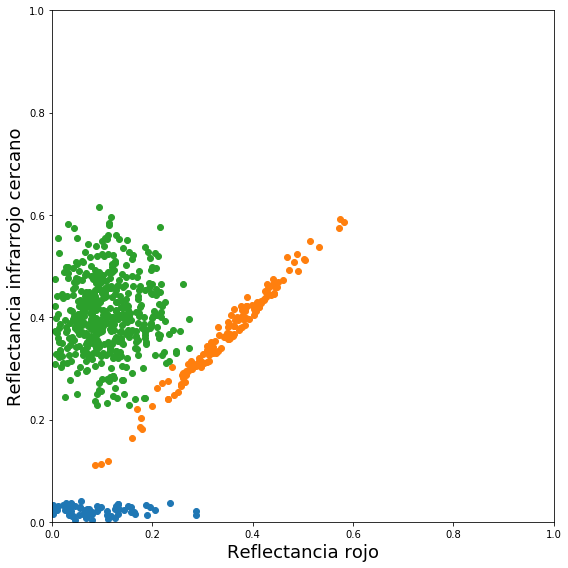

In [4]:
plt.figure(figsize=(8,8))

plt.plot(x1,y1,'o',label="Agua")
plt.plot(x2,y4,'o',label="Suelo")
plt.plot(x3,y3,'o',label="Vegetacion")

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Reflectancia rojo",fontsize=18)
plt.ylabel("Reflectancia infrarrojo cercano",fontsize=18)
plt.tight_layout()
plt.savefig("fig:cluster-info.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))

x = np.hstack([x1,x2,x3])
y = np.hstack([y1,y4,y3])

plt.plot(x,y,'ko')

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Reflectancia rojo",fontsize=18)
plt.ylabel("Reflectancia infrarrojo cercano",fontsize=18)
plt.tight_layout()
plt.savefig("fig:cluster-black.png",dpi=300,transparent=True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans


for i in range(1,11,1):
    km = KMeans(n_clusters=3, init='random', 
                max_iter=i, n_init=1, verbose=0, random_state=0)

    array = np.array([x,y]).transpose()

    km.fit(array)
    prediction = km.predict(array)

    plt.figure(figsize=(8,8))

    mask = prediction==2
    plt.plot(x[mask],y[mask],'o',label="Agua")
    plt.plot(np.mean(x[mask]),np.mean(y[mask]),'ks',markersize=12)

    mask = prediction==1
    plt.plot(x[mask],y[mask],'o',label="Suelo")
    plt.plot(np.mean(x[mask]),np.mean(y[mask]),'ks',markersize=12)

    mask = prediction==0
    plt.plot(x[mask],y[mask],'o',label="Vegetacion")
    plt.plot(np.mean(x[mask]),np.mean(y[mask]),'ks',markersize=12)

    plt.legend()
    plt.title("Inercia {:4.2f} - Iteración {}".format(km.inertia_,i),fontsize=18)

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("Reflectancia rojo",fontsize=18)
    plt.ylabel("Reflectancia infrarrojo cercano",fontsize=18)
    plt.tight_layout()
    plt.savefig("fig:cluster-{}.png".format(i),dpi=300,transparent=True)
    plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.xticks([-1.5,-1,0,1,2,3,4,5,5.5],
           ["","0.1 m","1 m","10 m","100 m", "1 km", "10 km", "100km"])
plt.xlabel("Resolución espacial")
plt.yticks([-4.5,-4,-3,-2,-1,0,1,2,2.5],
           ["","1 hora", "8 horas", "4 días", "1 mes", "1 año", "10 años", "100 años"],rotation=70 )
plt.ylabel("Resolución temporal")

ax = plt.axes() 

ax.add_patch(patches.Ellipse((2,1.8),2,1, facecolor="#fb9a99",edgecolor="black"))
ax.annotate("Geologia",(2,1.8),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.5,1),3,1, facecolor="#33a02c",edgecolor="black"))
ax.annotate("Forestal",(1.5,1.2),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((-0.5,0.9),1,1, facecolor="#e31a1c",edgecolor="black"))
ax.annotate("Topografía",(-0.5,0.9),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.25,0.5),3,1, facecolor="#fdbf6f",edgecolor="black"))
ax.annotate("Uso del suelo",(1.4,0.7),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.5,-1),2,3, facecolor="#b2df8a",edgecolor="black"))
ax.annotate("Rendimiento\n de cultivos",(1.9,-1),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((0.3,-1),2,3.5, facecolor="#ff7f00",edgecolor="black"))
ax.annotate("Infraestructura\n Transporte",(0.3,-.2),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((0,-1.25),1.5,1.3, facecolor="#cab2d6",edgecolor="black"))
ax.annotate("Agricultura de\n presición",(0,-1.25),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((-.5,-3),1.2,1.2, facecolor="#6a3d9a",edgecolor="black",alpha=0.8))
ax.annotate("Emergencia",(-.5,-3),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((4.3,1.5),2,1, facecolor="#1f78b4",edgecolor="black"))
ax.annotate("Climatología",(4.3,1.5),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((4,-3.5),1.8,1.8, facecolor='#a6cee3',edgecolor="black"))
ax.annotate("Tiempo",(4,-3.5),horizontalalignment='center',
           verticalalignment='center')


points = np.linspace(-1.5,5.5)
y1 = np.log10(16/365)
ax.annotate("Landsat, 16 días",(4,y1),horizontalalignment='left',
           verticalalignment='bottom')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)

y1 = np.log10(8/365)
ax.annotate("Sentinel 2, 8 días",(4,y1),horizontalalignment='left',
           verticalalignment='bottom')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)

y1 = np.log10(1/365)
ax.annotate("MODIS, 1 día",(4,y1),horizontalalignment='left',
           verticalalignment='bottom')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)

plt.tight_layout()
plt.savefig("fig:evst.png",dpi=300,transparent=True)
plt.show()

In [5]:
from scipy.interpolate import interp1d

wl = np.genfromtxt("splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF/splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt",skip_header=True)
refV = np.genfromtxt("splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF/splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF.txt",skip_header=True)
refS = np.genfromtxt("splib07a_Rangeland_C03-027_S27percent_G19percent_ASDFRa_AREF/splib07a_Rangeland_C03-027_S27%_G19%_ASDFRa_AREF.txt",skip_header=True)
refA = np.genfromtxt("splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF/splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF.txt",skip_header=True)
wlA = np.genfromtxt("splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF/splib07a_Wavelengths_BECK_Beckman_0.2-3.0_microns.txt",skip_header=True)
refS[refS<0] = np.nan
w=np.isnan(refS)
A =  interp1d(wl[~w],refS[~w],fill_value = 'extrapolate',kind='cubic')
S = A(wl)

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:spec.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.655-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='red',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.560-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='green',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.48-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='blue',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:esreal.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.520-0.02, 0),   # (x,y)
            (0.2),          # width
            (1),       # Height
            facecolor='grey',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:especlow.png",dpi=300,transparent=True)
plt.show()

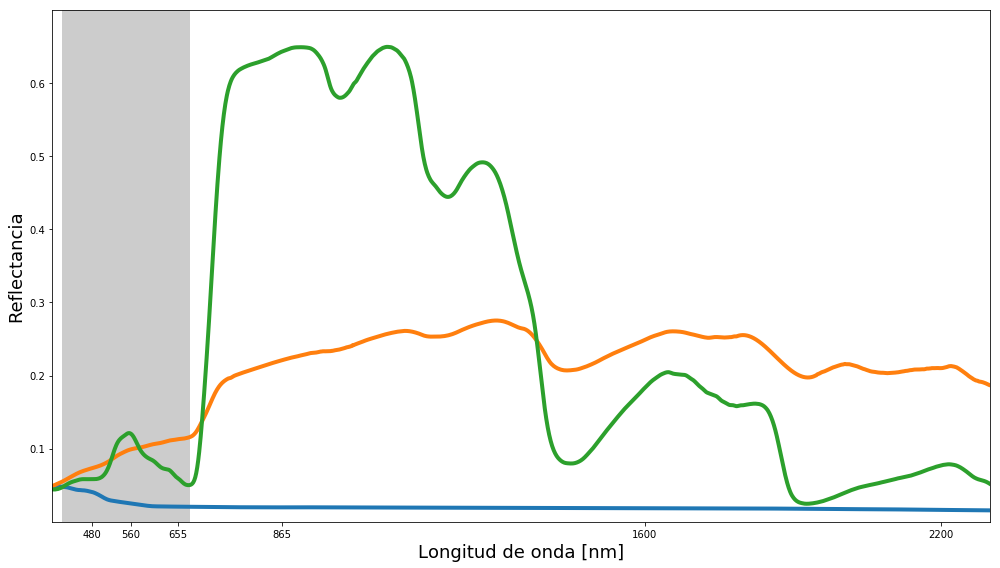

In [7]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.420, 0),   # (x,y)
            (0.260),          # width
            (1),       # Height
            facecolor='grey',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:eslo.png",dpi=300,transparent=True)
plt.show()

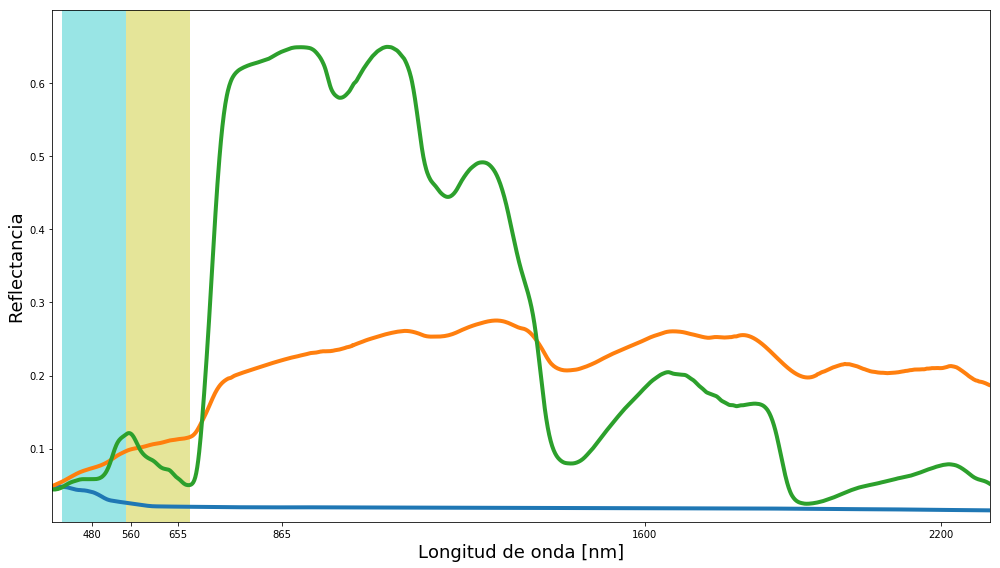

In [10]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.420, 0),   # (x,y)
            (0.130),          # width
            (1),       # Height
            facecolor='c',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.550, 0),   # (x,y)
            (0.130),          # width
            (1),       # Height
            facecolor='y',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:esmid.png",dpi=300,transparent=True)
plt.show()

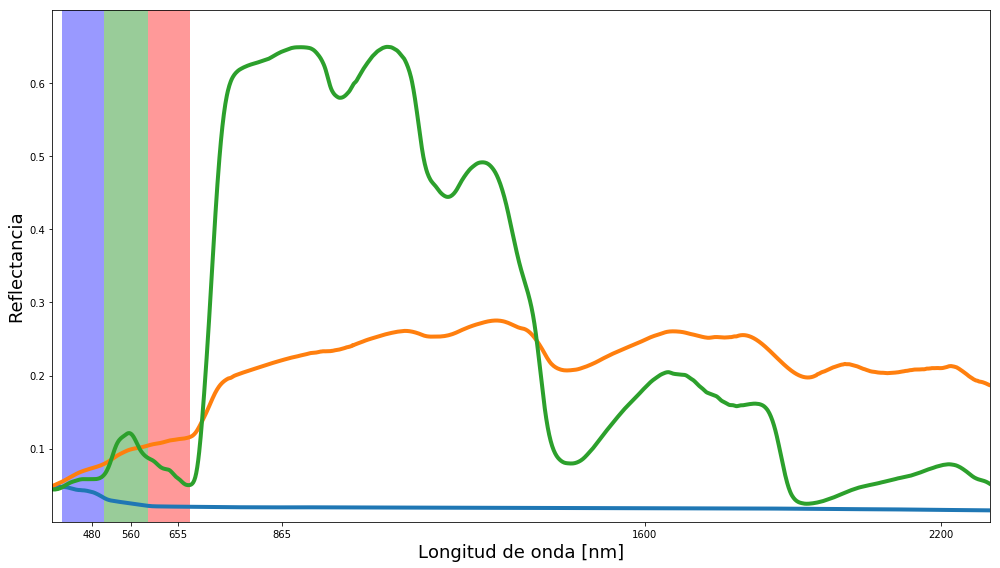

In [11]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.420, 0),   # (x,y)
            (0.085),          # width
            (1),       # Height
            facecolor='b',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.505, 0),   # (x,y)
            (0.090),          # width
            (1),       # Height
            facecolor='g',
            alpha=0.4
            )
            )


ax1.axes.add_patch(
        patches.Rectangle(
            (0.595, 0),   # (x,y)
            (0.085),          # width
            (1),       # Height
            facecolor='r',
            alpha=0.4
            )
            )


plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:eshig.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.520-0.02, 0),   # (x,y)
            (0.095),          # width
            (1),       # Height
            facecolor='green',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.520-0.02+0.1, 0),   # (x,y)
            (0.095),          # width
            (1),       # Height
            facecolor='red',
            alpha=0.4
            )
            )



plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:eshi.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.865-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='red',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (1.600-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='green',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.655-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='blue',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:escomp.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.865-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='red',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.655-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='green',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.560-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='blue',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:esir.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:spec.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
#plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.655,0.865],
           [655,865], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.865-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='red',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.655-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='green',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:firmasin.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
#plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.655,0.865],
           [655,865], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

plt.plot(np.array([.760,.760]),np.array([0.05,0.63]),'k',lw=4)
plt.plot(np.array([.756,.764]),np.array([0.63,0.63]),'k',lw=4)
plt.plot(np.array([.756,.764]),np.array([0.05,0.05]),'k',lw=4)

ax1.axes.add_patch(
        patches.Rectangle(
            (0.865-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='red',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.655-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='green',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]",fontsize=18)
plt.ylabel("Reflectancia",fontsize=18)
plt.tight_layout()
plt.savefig("fig:firmasalto.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
#plt.plot(wlA,refA,'C0',lw=4)
plt.ylim(-0.01,0.7)
plt.xlim(-5,705)
NDVI= np.random.uniform(0,0.6,100)
noise1 = np.random.normal(0,0.04,100)
noise2 = np.random.normal(0,5,100)
biom = 45.838*np.exp(4.645*NDVI)
plt.plot(biom+noise2,NDVI+noise1,'o')
plt.yticks([0.0,0.2,0.4,0.6],[0.0,0.2,0.4,0.6])

plt.xlabel(r"Biomasa $[g/m^2]$",fontsize=18)
plt.ylabel("NDVI",fontsize=18)
plt.tight_layout()
plt.savefig("fig:biomasa.png",dpi=300,transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
#plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4,label="Cobertura 0%")
plt.plot(wl,refV,'C2',lw=4,label="Cobertura 100%")
for i in np.linspace(0.1,0.9,9,endpoint=True):
    plt.plot(wl,i*S+(1-i)*refV,'k--',lw=2,alpha=0.5)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.655,0.865],
           [655,865], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

ax1.axes.add_patch(
        patches.Rectangle(
            (0.865-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='red',
            alpha=0.4
            )
            )

ax1.axes.add_patch(
        patches.Rectangle(
            (0.655-0.025, 0),   # (x,y)
            (0.05),          # width
            (1),       # Height
            facecolor='green',
            alpha=0.4
            )
            )

plt.xlabel("Longitud de onda [nm]")
plt.legend()
plt.ylabel("Reflectancia")
plt.tight_layout()
plt.savefig("fig:firmavar.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
#plt.plot(wlA,refA,'C0',lw=4)
#plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Reflectancia")
plt.tight_layout()
plt.savefig("fig:v.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
#plt.plot(wlA,refA,'C0',lw=4)
plt.plot(wl,S,'C1',lw=4)
#plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Reflectancia")
plt.tight_layout()
plt.savefig("fig:s.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(wlA,refA,'C0',lw=4)
#plt.plot(wl,S,'C1',lw=4)
#plt.plot(wl,refV,'C2',lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.480,0.560,0.655,0.865,1.600,2.200],
           [480,560,655,865,1600,2200], rotation=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],[0.1,0.2,0.3,0.4,0.5,0.6])

plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Reflectancia")
plt.tight_layout()
plt.savefig("fig:a.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
#plt.plot(wlA,refA,'C0',lw=4)
#plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xticks([0.482,0.561,0.654,0.865,1.608,2.200],
           ["Azul","Verde","Rojo","NIR", "SWIR 1","SWIR 2"], rotation=70)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],["10%","20%","30%","40%","50%","60%"])
plt.xlim(0.4,0.7)
plt.ylim(0,0.2)


plt.ylabel("Porcentaje de luz reflejada")
plt.tight_layout()
plt.savefig("fig:v.png",dpi=300)
plt.show()

In [ ]:
c =  299792458.0
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(21,9))
ax1 = fig.add_subplot(111)
x = np.logspace(-13,3,10000)
ticks = np.arange(-12,2,1)
y = np.sin(np.log(x/10**3.5)**2/np.log(40))*0.20+0.75
plt.plot(x,y,'black',alpha=0.5)

# Regiones del espectro
plt.axvline(x=10**-11,ymin=0.2,ymax=0.5)
plt.axvline(x=10**-9,ymin=0.2,ymax=0.5)
plt.axvline(x=400*10**-9,ymin=0.2,ymax=0.5)
plt.axvline(x=780*10**-9,ymin=0.2,ymax=0.5)
plt.axvline(x=10**-4,ymin=0.2,ymax=0.5)
plt.axvline(x=10**-1,ymin=0.2,ymax=0.5)

# parches
ax1.axes.add_patch(
    patches.Rectangle(
        (0.4*10**-6, 0.2),   # (x,y)
        20*10**-9,          # width
        0.3,          # height
        facecolor="violet",
        edgecolor="violet"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.42*10**-6, 0.2),   # (x,y)
        20*10**-9,          # width
        0.3,          # height
        facecolor="indigo",
        edgecolor="indigo"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.44*10**-6, 0.2),   # (x,y)
        50*10**-9,          # width
        0.3,          # height
        facecolor="blue",
        edgecolor="blue"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.49*10**-6, 0.2),   # (x,y)
        80*10**-9,          # width
        0.3,          # height
        facecolor="green",
        edgecolor="green"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.57*10**-6, 0.2),   # (x,y)
        15*10**-9,          # width
        0.3,          # height
        facecolor="yellow",
        edgecolor="yellow"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.585*10**-6, 0.2),   # (x,y)
        35*10**-9,          # width
        0.3,          # height
        facecolor="orange",
        edgecolor="orange"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.62*10**-6, 0.2),   # (x,y)
        160*10**-9,          # width
        0.3,          # height
        facecolor="red",
        edgecolor="red"
    )
)

# Texto en los ejes
ax1.text(10**-12,0.35,s="Rayos gama",horizontalalignment='center')
ax1.text(10**-10,0.35,s="Rayos X",horizontalalignment='center')
ax1.text(10**-7.699,0.35,s="Ultravioleta",horizontalalignment='center')
ax1.text(10**-6.253,0.15,s="Visible",horizontalalignment='center')
ax1.text(10**-5.054,0.35,s="Infrarrojo",horizontalalignment='center')
ax1.text(10**-2.5,0.35,s="Microondas",horizontalalignment='center')
ax1.text(10**1,0.35,s="Radio\nTV",horizontalalignment='center',verticalalignment='center')

ax1.text(0.3,0.1,s="📱",horizontalalignment='center',verticalalignment='center',fontname="Twitter Color Emoji",fontsize=40)
ax1.text(2,0.1,s="📺",horizontalalignment='center',verticalalignment='center',fontname="Twitter Color Emoji",fontsize=40)
ax1.text(30,0.1,s="📡",horizontalalignment='center',verticalalignment='center',fontname="Twitter Color Emoji",fontsize=40)
ax1.text(0.55*10**-6,0.1,s="👀",horizontalalignment='center',verticalalignment='center',fontname="Twitter Color Emoji",fontsize=40)
ax1.text(0.5*10**-9,0.1,s="☠️",horizontalalignment='center',verticalalignment='center',fontname="Twitter Color Emoji",fontsize=40)
ax1.text(0.5*10**-11,0.1,s="☢️",horizontalalignment='center',verticalalignment='center',fontname="Twitter Color Emoji",fontsize=40)



# Ventanas atmosfericas
data = np.loadtxt("atm_w.csv",delimiter=',')
xo = data[:,0]
yo = data[:,1]
plt.fill_between(xo,yo*0.5+0.5,0.5,facecolor='black',alpha=0.1)


# Configuracion ejes
plt.ylim(0,1)
#plt.yticks([])
plt.xscale('log')

plt.xlim(10**-13,1000)
plt.xlabel("Longitud de onda [m]")

ticks = np.array([6.,9.,12.,15.,18.,21.])
xticks = c/10.**ticks
plt.yticks([], [])
ax2 = ax1.twiny()
ax2.set_xlim(10**-13,1000)
ax2.set_xscale('log')
ax2.set_xticks(xticks)
ax2.set_xticklabels([r"$10^6$",r"$10^9$",r"$10^{12}$",r"$10^{15}$",r"$10^{18}$",r"$10^{21}$"])
ax2.set_xlabel("Frecuencia [Hz]")
plt.tight_layout()
plt.savefig("fig:espectro.png",dpi=300,transparent=True)
plt.show()

In [ ]:
j=0
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'
for i in np.linspace(1,21,801):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(21,6))

    x = np.linspace(0,10,500)

    y = np.exp(-(x-i)**2/0.1)*0.2+0.5
    ax1 = fig.add_subplot(111)
    ax1.text(1,0.3,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=100,fontname="Twitter Color Emoji")
    ax1.text(7,0.3,s='🏠',horizontalalignment='center',verticalalignment='center',fontsize=100,fontname="Twitter Color Emoji")
    ax1.text(9,0.3,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=100,fontname="Twitter Color Emoji")

    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.plot(x,y,lw=4)
    if i > 7:
        y2 = np.exp(-(x-(2*7-i))**2/0.1)*0.2+0.5
        plt.plot(x,y2,lw=4)
    if i > 9:
        y3 = np.exp(-(x-(2*9-i))**2/0.1)*0.2+0.5
        plt.plot(x,y3,lw=4)
    ax1.text(1,0.9,s="Tiempo: {:6.3f}s".format(i-1),horizontalalignment='center',verticalalignment='center',fontsize=25)
    if i >= 13:
        ax1.text(7,0.9,s='Eco 1 = 12.0s',horizontalalignment='center',verticalalignment='center',fontsize=25)
    if i >= 17:
        ax1.text(9,0.9,s='Eco 2 = 16.0s',horizontalalignment='center',verticalalignment='center',fontsize=25)
    plt.tight_layout()
    plt.savefig("fig-funcionamiento"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    j=j+1
    plt.show()

In [ ]:
# Comando para animar
# ffmpeg -r 40 -f image2 -s 6300x1800 -i fig-funcionamiento%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p test.mp4

In [ ]:
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'
plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(21,6))
x = np.linspace(0,12)
ax1 = fig.add_subplot(111)
for i in np.linspace(2.5,3.5,3):
    ax1.text(i,0.30,s='🌳',horizontalalignment='center',verticalalignment='bottom',fontsize=80,fontname="Twitter Color Emoji")
for i in np.linspace(4.5,5.5,10):
    ax1.text(i,0.30,s='🌿',horizontalalignment='center',verticalalignment='bottom',fontsize=30,fontname="Twitter Color Emoji")
for i in np.random.uniform(6.5,7.5,20):
    ax1.text(i,0.285,s='.',horizontalalignment='center',verticalalignment='bottom',fontsize=30)
for i in np.random.uniform(6.5,7.5,5):
    ax1.text(i,0.27,s='.',horizontalalignment='center',verticalalignment='bottom',fontsize=50)
    
ax1.text(9.3,0.30,s='🏔️',horizontalalignment='center',verticalalignment='bottom',fontsize=150,fontname="Twitter Color Emoji")
ax1.text(11.3,0.30,s='🏙️',horizontalalignment='center',verticalalignment='bottom',fontsize=150,fontname="Twitter Color Emoji")

ax1.text(1,0.20,s='Superficie plana',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(3,0.20,s='Bosque',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(5,0.20,s='Cultivo',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(7,0.20,s='Superficie rugosa',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(9,0.20,s='Montaña',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(11,0.20,s='Ciudad',horizontalalignment='center',verticalalignment='center',fontsize=20)


ax1.axes.add_patch(
    patches.Rectangle(
        (0.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="black",
        hatch='..',
        edgecolor="darkgrey"
    )
)

ax1.axes.add_patch(
    patches.Rectangle(
        (2.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="lightgrey",
        hatch='\ \ \ / / /',
        edgecolor="grey"
    )
)

ax1.axes.add_patch(
    patches.Rectangle(
        (4.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="lightgrey",
        hatch='\ /'
    )
)

ax1.axes.add_patch(
    patches.Rectangle(
        (6.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="darkgrey",
        hatch='\ \ / /'
    )
)

ax1.axes.add_patch(
    patches.Rectangle(
        (8.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="darkgrey"
    )
)

ax1.axes.add_patch(
    patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[8.6,-0.15]]),True,facecolor="white")
)
ax1.axes.add_patch(
    patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[8.73,-0.15]]),True,facecolor="black")
)
ax1.axes.add_patch(
    patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[9.4,-0.15]]),True,facecolor="black")
)

ax1.axes.add_patch(
    patches.Rectangle(
        (10.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="lightgrey"
    )
)

ax1.axes.add_patch(
    patches.Polygon(np.array([[10.7,-0.05],[10.9,0.0],[11.0,-.2],[10.8,-0.25]]),True,facecolor="white")
)
ax1.axes.add_patch(
    patches.Polygon(np.array([[11.0,-0.05],[11.2,0.0],[11.3,-.2],[11.1,-0.25]]),True,facecolor="white")
)

ax1.axes.add_patch(
    patches.Polygon(np.array([[10.9,0.0],[11.0,-0.05],[11.1,-0.25],[11.0,-.2]]),True,facecolor="black")
)


ax1.text(0.4,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")

plt.yticks([], [])
plt.xticks([], [])
plt.plot(x,0*x+0.3,'black',lw=4)
plt.xlim(0,12)
plt.ylim(-0.5,1)
plt.tight_layout()
plt.savefig("fig:blancos.png",dpi=300,transparent=True)

plt.show()

In [ ]:
j=1
steps = 81
r0= 0.5
r = r0
r1=r0
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'
for i in np.linspace(1,9,321):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(16,8))

    x = np.linspace(7.5,12.5,100)


    ax1 = fig.add_subplot(111)
    ax1.text(1,i,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    ax1.text(5,5,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")

    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,20)
    plt.ylim(0,10)
    print(i,r,r1)
    if int(i*2) == 2*i:
        r=r0
        wait = True
        emit = False
    if r >4:
        emit = True
        
    if r <= 6:
        ax1.axes.add_patch(patches.Wedge((1, i), r, -10, 10, width=0.10))
        r = r+r0

    if i >= 4.2 and i<=6.0 and emit and wait:
        if r1 <= 5:
            ax1.axes.add_patch(patches.Wedge((5, 5), r1, 160, 200, width=0.10), )
            r1 = r1+r0
        else:
            r1 = r0
            emit = False
            wait = False
    for k in range(2,int(2*(i+0.1))):
        l=0
        h=1
        if k == 11 or k == 8:
            l = 10.5
            h = 0.4
        if k == 9 or k == 10:
            l = 10.3
            h = 0.9
        plt.plot(x,np.exp(-(x-l)**2*20)*h+k/2+0.25,"black")

    for k in range(2,int(2*(i+0.1))):
        l=0
        h=1
        if k == 11 or k == 8:
            l = 10.5
            h = 0.4
        if k == 9 or k == 10:
            l = 10.3
            h = 0.9
        plt.plot(x,np.exp(-(x-l)**2*20)*h+k/2+0.25,"black")
        ax1.axes.add_patch(
        patches.Rectangle(
            (14,k/2+0.25),   # (x,y)
            5,          # width
            0.5,          # height
            facecolor="black",
            )
        )
        if k >= 9:
            ax1.axes.add_patch(
            patches.Rectangle(
                (16.5,4.75),   # (x,y)
                0.5,          # width
                0.5,          # height
                facecolor="darkgray",
                )
            )
        if k >= 10:
            ax1.axes.add_patch(
            patches.Rectangle(
                (16.0,4.75),   # (x,y)
                0.5,          # width
                0.5,          # height
                facecolor="lightgray",
                )
            )
        if k >= 11:
            ax1.axes.add_patch(
            patches.Rectangle(
                (16.0,5.25),   # (x,y)
                0.5,          # width
                0.5,          # height
                facecolor="lightgray",
                )
            )
        if k >= 12:
            ax1.axes.add_patch(
            patches.Rectangle(
                (16.5,5.25),   # (x,y)
                0.5,          # width
                0.5,          # height
                facecolor="darkgray",
                )
            )
    ax1.text(2,0.5,s='Terreno',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(10,0.5,s='Potencia recibida',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(16.5,0.5,s='Imagen generada',horizontalalignment='center',verticalalignment='center',fontsize=20)
    plt.tight_layout()
    plt.savefig("fig-imagen"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    j=j+1
    plt.show()

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'
for i in np.linspace(2,11,200):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(16,7))

    x = np.linspace(4,9,500)


    ax1 = fig.add_subplot(111)
    ax1.text(10,15,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")
    ax1.text(3,17,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    ax1.text(3,13,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")

    ax1.text(10,5,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")
    ax1.text(3,7,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    ax1.text(2,3,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    
    mod = np.exp(-(x-i)**2)
    
    plt.plot(x,mod*np.sin(4*np.pi*x)+3,"black")
    plt.plot(x,-mod*np.sin(4*np.pi*x)+7,"black")
    
    plt.plot(x,mod*np.sin(4*np.pi*x)+13,"black")
    plt.plot(x,mod*np.sin(4*np.pi*x)+17,"black")
    
    plt.plot(x+6.5,mod*np.sin(4*np.pi*x)+5,"black",alpha=0.1)
    plt.plot(x+6.5,-mod*np.sin(4*np.pi*x)+5,"black",alpha=0.1)
    plt.plot(x+6.5,0*mod*np.sin(4*np.pi*x)+5,"black")
    
    plt.plot(x+6.5,mod*np.sin(4*np.pi*x)+15,"black",alpha=0.1)
    plt.plot(x+6.5,mod*np.sin(4*np.pi*x)+15,"black",alpha=0.1)
    
    plt.plot(x+6.5,2*mod*np.sin(4*np.pi*x)+15,"black")
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,20)
    plt.ylim(-1,20)
    
    ax1.axes.add_patch(
    patches.Rectangle(
        (0.8,1),   # (x,y)
        3,          # width
        8,          # height
        facecolor="lightgray",
        )
    )
    
    ax1.axes.add_patch(
    patches.Rectangle(
        (0.8,11),   # (x,y)
        3,          # width
        8,          # height
        facecolor="lightgray",
        )
    )
    
    ax1.axes.add_patch(
    patches.Rectangle(
        (16,11),   # (x,y)
        3,          # width
        8,          # height
        facecolor="lightgray",
        )
    )
    
    ax1.axes.add_patch(
    patches.Rectangle(
        (16,1),   # (x,y)
        3,          # width
        8,          # height
        facecolor="k",
        )
    )
    ax1.text(2.3,0,s='Terreno',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(6.3,0,s='Señales individuales',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(12.8,0,s='Señal sumada',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(17.45,0,s='Píxel resultante',horizontalalignment='center',verticalalignment='center',fontsize=20)
    
    plt.tight_layout()
    plt.savefig("fig-speckle"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    j=j+1
    plt.show()

In [ ]:
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(111)

plt.yticks([], [])
plt.xticks([], [])
plt.xlim(0,16)
plt.ylim(0,8)

for i in range(3):
    for j in range(3):
        ax1.axes.add_patch(patches.Rectangle((1+i,1+j), 1, 1,facecolor="lightgray",alpha=np.random.uniform(0.5,1)))
for i in range(3):
    for j in range(3):
        ax1.axes.add_patch(patches.Rectangle((4+i,1+j), 1, 1,facecolor="darkgrey",alpha=np.random.uniform(0.5,1)))
        
for i in range(3):
    for j in range(3):
        ax1.axes.add_patch(patches.Rectangle((1+i,4+j), 1, 1,facecolor="black",alpha=np.random.uniform(0.5,1)))
for i in range(3):
    for j in range(3):
        ax1.axes.add_patch(patches.Rectangle((4+i,4+j), 1, 1,facecolor="darkgrey",alpha=np.random.uniform(0.5,1)))
        
ax1.axes.add_patch(patches.Rectangle((9,1), 3, 3,facecolor="lightgrey",alpha=np.random.uniform(0.5,1)))
ax1.axes.add_patch(patches.Rectangle((12,1), 3, 3,facecolor="darkgrey",alpha=np.random.uniform(0.5,1)))
ax1.axes.add_patch(patches.Rectangle((9,4), 3, 3,facecolor="black",alpha=np.random.uniform(0.5,1)))
ax1.axes.add_patch(patches.Rectangle((12,4), 3, 3,facecolor="darkgrey",alpha=np.random.uniform(0.5,1)))

ax1.text(8.25,4,s='➡️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")

plt.tight_layout()
plt.savefig("fig:multilook.png",dpi=300,transparent=False)

plt.show()

In [ ]:
j=1
l=1
steps = 81
r0= 0.5
r = r0
r1=r0
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'
for i in np.linspace(1,9,401):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(8,8))

    x = np.linspace(7.5,12.5,100)


    ax1 = fig.add_subplot(111)
    ax1.text(1,i,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    2
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,10)
    plt.ylim(0,10)

    ax1.axes.add_patch(patches.Rectangle((5,0.5), 0.05, 9,facecolor="black"))
    ax1.axes.add_patch(patches.Rectangle((7,0.5), 0.05, 9,facecolor="black"))
    ax1.axes.add_patch(patches.Rectangle((9,0.5), 0.05, 9,facecolor="black"))
    k=1
    while k < i-0.14:
        for q in range(10):
            ax1.axes.add_patch(patches.Ellipse((6,k-(5-q)/50), 1.8, 1.2,alpha=0.05))
        k=k+0.5
    
    plt.tight_layout()
    if int(2*i) == 2*i:
        r=r0
        l=i
    print(i,l)
    if r <= 4.2:
        ax1.axes.add_patch(patches.Wedge((1, l), r, -10, 10, width=0.10,alpha=(4.2-r)/4.2))
        r = r+r0
    
    plt.savefig("fig-strip"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    j=j+1
    plt.show()

In [ ]:
j=1
l=1
steps = 81
r0= 0.5
r = r0
r1=r0
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'
for i in np.linspace(1,9,401):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(8,8))

    x = np.linspace(7.5,12.5,100)


    ax1 = fig.add_subplot(111)
    ax1.text(1,i,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,10)
    plt.ylim(0,10)

    ax1.axes.add_patch(patches.Rectangle((5,0.5), 0.05, 9,facecolor="black"))
    ax1.axes.add_patch(patches.Rectangle((7,0.5), 0.05, 9,facecolor="black"))
    ax1.axes.add_patch(patches.Rectangle((9,0.5), 0.05, 9,facecolor="black"))
    k=1
    change = 3
    row = 6

    while k < i-0.14:
        for q in range(10):
            ax1.axes.add_patch(patches.Ellipse((row,k-(5-q)/50), 1.8, 1.2,alpha=0.05))
        k=k+0.5
        change = change-1
        if (change==0 and row==6):
            row = 8
            change = 3
        elif (change==0 and row==8):
            row = 6
            change = 3
                
    
    plt.tight_layout()
    if int(2*i) == 2*i:
        r=r0
        l=i
        
    if r <= 4.2:
        ax1.axes.add_patch(patches.Wedge((1, l), r, -10, 10, width=0.10,alpha=(4.2-r)/4.2))
        r = r+r0
    
    plt.savefig("fig-scan"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    j=j+1
    plt.show()

In [ ]:
j=1
l=1
steps = 81
r0= 0.5
r = r0
r1=r0
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'
angle = -5
for i in np.linspace(1,9,401):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(8,8))

    x = np.linspace(7.5,12.5,100)


    ax1 = fig.add_subplot(111)
    ax1.text(1,i,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,10)
    plt.ylim(0,10)

    ax1.axes.add_patch(patches.Rectangle((5,0.5), 0.05, 9,facecolor="black"))
    ax1.axes.add_patch(patches.Rectangle((7,0.5), 0.05, 9,facecolor="black"))
    ax1.axes.add_patch(patches.Rectangle((9,0.5), 0.05, 9,facecolor="black"))
    k=1
    change = 3
    row = 6

    while k < i-0.14:
        for q in range(10):
            ax1.axes.add_patch(patches.Ellipse((row,k+(3-change)/2-(5-q)/50), 1.8, 1.2,alpha=0.05))
        k=k+0.5
        change = change-1
        if (change==0 and row==6):
            row = 8
            change = 3
        elif (change==0 and row==8):
            row = 6
            change = 3
                
    
    plt.tight_layout()
    if int(2*i) == 2*i:
        r=r0
        l=i
        angle = angle+5
        if angle ==15:
            angle=0
    
    if r <= 4.2:
        ax1.axes.add_patch(patches.Wedge((1, l), r, angle-10, angle+10, width=0.10,alpha=(4.2-r)/4.2))
        r = r+r0

    plt.savefig("fig-top"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    j=j+1
    plt.show()

In [ ]:
j=1
l=1
steps = 81
r0= 0.5
r = r0
r1=r0
plt.rcParams['axes.facecolor']='#fafafa'
plt.rcParams['savefig.facecolor']='#fafafa'
for i in np.linspace(1,9,401):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(8,8))

    x = np.linspace(7.5,12.5,100)


    ax1 = fig.add_subplot(111)
    ax1.text(1,i,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="EmojiOne Color")
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,10)
    plt.ylim(0,10)

    ax1.axes.add_patch(patches.Rectangle((5,0.5), 0.05, 9,facecolor="black"))
    ax1.axes.add_patch(patches.Rectangle((7,0.5), 0.05, 9,facecolor="black"))
    ax1.axes.add_patch(patches.Rectangle((9,0.5), 0.05, 9,facecolor="black"))
    k=1
    while k < i-0.14:
        ax1.axes.add_patch(patches.Ellipse((6,4.5+(k-4.5)/40), 1.8, 1.2,alpha=0.05))
        k=k+0.5

                
    
    plt.tight_layout()
    if int(2*i) == 2*i:
        r=r0
        l=i
    a = np.arctan((4.5-l)/5)*180/np.pi
    
    if r <= 4.2:
        ax1.axes.add_patch(patches.Wedge((1, l), r, a-10, a+10, width=0.10,alpha=(4.2-r)/4.2))
        r = r+r0
    
    plt.savefig("fig-spot"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    j=j+1
    plt.show()

In [ ]:
c =  299792458.0
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(21,9))
ax1 = fig.add_subplot(111)
x = np.logspace(-3,2,800)

y = np.sin(np.log(x/10**5.5)**2/np.log(20))*0.20+0.75
plt.plot(x,y,'black',alpha=0.5)

# Regiones del espectro
plt.axvline(x=0.0075,ymin=0.15,ymax=0.45)
plt.axvline(x=0.0113,ymin=0.15,ymax=0.45)
plt.axvline(x=0.0167,ymin=0.15,ymax=0.45)
plt.axvline(x=0.0240,ymin=0.15,ymax=0.45)
plt.axvline(x=0.0375,ymin=0.15,ymax=0.45)
plt.axvline(x=0.0750,ymin=0.15,ymax=0.45)
plt.axvline(x=0.150,ymin=0.15,ymax=0.45)
plt.axvline(x=0.30,ymin=0.15,ymax=0.45)
plt.axvline(x=1.30,ymin=0.15,ymax=0.45)

ax1.text(10**((np.log10(0.0113)+np.log10(0.0075))/2),0.3,s='Ka',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(10**((np.log10(0.0113)+np.log10(0.0167))/2),0.3,s='K',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(10**((np.log10(0.0240)+np.log10(0.0167))/2),0.3,s='Ku',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(10**((np.log10(0.0240)+np.log10(0.0375))/2),0.3,s='X',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(10**((np.log10(0.0750)+np.log10(0.0375))/2),0.3,s='C',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(10**((np.log10(0.0750)+np.log10(0.15))/2),0.3,s='S',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(10**((np.log10(0.30)+np.log10(0.15))/2),0.3,s='L',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(10**((np.log10(0.30)+np.log10(1.3))/2),0.3,s='P',horizontalalignment='center',verticalalignment='center',fontsize=20)

# Ventanas atmosfericas
data = np.loadtxt("atm_w.csv",delimiter=',')
xo = data[:,0]
yo = data[:,1]
plt.fill_between(xo,yo*0.5+0.5,0.5,facecolor='black',alpha=0.1)


# Configuracion ejes
plt.ylim(0,1)
plt.yticks([])
plt.xscale('log')

plt.xlim(0.007,1.5)
plt.xlabel("Longitud de onda [m]")
plt.xticks([0.01,0.03,0.1,0.3,1],["1cm","3cm","10cm","30cm","1m"])
plt.tight_layout()
plt.savefig("fig:espectrozoom.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

x = np.linspace(0.12,1)
y = 3*(0.12-x)+0.85
z = 1*(0.12-x)+0.85

plt.plot(x,y,'k--',alpha=0.3)
plt.plot(x,z,'k--',alpha=0.3)

ax1.text(0.15,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
ax1.axes.add_patch(patches.Rectangle((0.,0), 1, 0.01,facecolor="black"))


ax1.text(0.18,0.1,s='Near range',horizontalalignment='center',verticalalignment='center')
ax1.text(0.70,0.1,s='Far range',horizontalalignment='center',verticalalignment='center')

# Configuracion ejes
plt.ylim(0,1)
plt.yticks([])
plt.xticks([])

plt.xlim(0,1)
plt.tight_layout()
plt.savefig("fig:near-far.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

x = np.linspace(0.12,1)
y = 1.5*(0.12-x)+0.85

plt.plot(x,y,'k--',alpha=0.3)
t = np.ones(5)*0.12
p = np.linspace(0.55,0.85,5)
plt.plot(t,p,'k',alpha=0.3)


ax1.text(0.15,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
ax1.axes.add_patch(patches.Rectangle((0.,0), 1, 0.01,facecolor="black"))
ax1.axes.add_patch(patches.Wedge((0.12, 0.85), 0.2, -90, -56, width=0.005))

ax1.text(0.20,0.57,s='Look\nangle',horizontalalignment='center',verticalalignment='center')

# Configuracion ejes
plt.ylim(0,1)
plt.yticks([])
plt.xticks([])

plt.xlim(0,1)
plt.tight_layout()
plt.savefig("fig:look.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

x = np.linspace(0.12,1)
y = 1.5*(0.12-x)+0.85

plt.plot(x,y,'k--',alpha=0.3)
t = np.ones(5)*0.68
p = np.linspace(0.0,0.30,5)
plt.plot(t,p,'k',alpha=0.3)


ax1.text(0.15,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
ax1.axes.add_patch(patches.Rectangle((0.,0), 1, 0.01,facecolor="black"))
ax1.axes.add_patch(patches.Wedge((0.68, 0.0), 0.2, 90, 123, width=0.005))

ax1.text(0.60,0.30,s='Incident\nangle',horizontalalignment='center',verticalalignment='center')

# Configuracion ejes
plt.ylim(0,1)
plt.yticks([])
plt.xticks([])

plt.xlim(0,1)
plt.tight_layout()
plt.savefig("fig:inc.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

x = np.linspace(0.12,1)
y = 3*(0.12-x)+0.85
z = 1*(0.12-x)+0.85

plt.plot(x,y,'k--',alpha=0.3)
plt.plot(x,z,'k--',alpha=0.3)

ax1.text(0.15,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
ax1.axes.add_patch(patches.Rectangle((0.,0), 1, 0.02,facecolor="black"))
ax1.axes.add_patch(patches.Rectangle((0.4,0), 0.56, 0.02,facecolor="lightgrey"))


ax1.text(0.60,0.1,s='Ancho de barrido',horizontalalignment='center',verticalalignment='center')

# Configuracion ejes
plt.ylim(0,1)
plt.yticks([])
plt.xticks([])

plt.xlim(0,1)
plt.tight_layout()
plt.savefig("fig:swath.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'
plt.rcParams.update({'font.size': 18})

random1 = np.random.uniform(6.5,7.5,20)
random2 = np.random.uniform(6.5,7.5,5)

for indice in np.arange(100):

    fig = plt.figure(figsize=(21,6))
    x = np.linspace(0,12)
    ax1 = fig.add_subplot(111)
    for i in np.linspace(2.5,3.5,3):
        ax1.text(i,0.30,s='🌳',horizontalalignment='center',verticalalignment='bottom',fontsize=80,fontname="Twitter Color Emoji")
    for i in np.linspace(4.5,5.5,10):
        ax1.text(i,0.30,s='🌿',horizontalalignment='center',verticalalignment='bottom',fontsize=30,fontname="Twitter Color Emoji")
    for i in random1:
        ax1.text(i,0.285,s='.',horizontalalignment='center',verticalalignment='bottom',fontsize=30)
    for i in random2:
        ax1.text(i,0.27,s='.',horizontalalignment='center',verticalalignment='bottom',fontsize=50)

    ax1.text(9.3,0.30,s='🏔️',horizontalalignment='center',verticalalignment='bottom',fontsize=150,fontname="Twitter Color Emoji")
    ax1.text(11.3,0.30,s='🏙️',horizontalalignment='center',verticalalignment='bottom',fontsize=150,fontname="Twitter Color Emoji")

    ax1.text(1,0.20,s='Superficie plana',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(3,0.20,s='Bosque',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(5,0.20,s='Cultivo',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(7,0.20,s='Superficie rugosa',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(9,0.20,s='Montaña',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(11,0.20,s='Ciudad',horizontalalignment='center',verticalalignment='center',fontsize=20)


    ax1.axes.add_patch(
        patches.Rectangle(
            (0.5,0.1),   # (x,y)
            1,          # width
            -0.5,          # height
            facecolor="black",
            hatch='..',
            edgecolor="darkgrey"
        )
    )

    ax1.axes.add_patch(
        patches.Rectangle(
            (2.5,0.1),   # (x,y)
            1,          # width
            -0.5,          # height
            facecolor="lightgrey",
            hatch='\ \ \ / / /',
            edgecolor="grey"
        )
    )

    ax1.axes.add_patch(
        patches.Rectangle(
            (4.5,0.1),   # (x,y)
            1,          # width
            -0.5,          # height
            facecolor="lightgrey",
            hatch='\ /'
        )
    )

    ax1.axes.add_patch(
        patches.Rectangle(
            (6.5,0.1),   # (x,y)
            1,          # width
            -0.5,          # height
            facecolor="darkgrey",
            hatch='\ \ / /'
        )
    )

    ax1.axes.add_patch(
        patches.Rectangle(
            (8.5,0.1),   # (x,y)
            1,          # width
            -0.5,          # height
            facecolor="darkgrey"
        )
    )

    ax1.axes.add_patch(
        patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[8.6,-0.15]]),True,facecolor="white")
    )
    ax1.axes.add_patch(
        patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[8.73,-0.15]]),True,facecolor="black")
    )
    ax1.axes.add_patch(
        patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[9.4,-0.15]]),True,facecolor="black")
    )

    ax1.axes.add_patch(
        patches.Rectangle(
            (10.5,0.1),   # (x,y)
            1,          # width
            -0.5,          # height
            facecolor="lightgrey"
        )
    )

    ax1.axes.add_patch(
        patches.Polygon(np.array([[10.7,-0.05],[10.9,0.0],[11.0,-.2],[10.8,-0.25]]),True,facecolor="white")
    )
    ax1.axes.add_patch(
        patches.Polygon(np.array([[11.0,-0.05],[11.2,0.0],[11.3,-.2],[11.1,-0.25]]),True,facecolor="white")
    )

    ax1.axes.add_patch(
        patches.Polygon(np.array([[10.9,0.0],[11.0,-0.05],[11.1,-0.25],[11.0,-.2]]),True,facecolor="black")
    )


    ax1.text(0.4,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")

    t = np.cos(2*np.pi*np.real(indice)/100)**2

    ax1.annotate("", xy=(1, 0.31), xytext=(0.5, 0.61),arrowprops=dict(arrowstyle="->",alpha=t,lw=5,color='C0'))
    ax1.annotate("", xy=(1.5, 0.61), xytext=(1, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=5,color='C1'))

    ax1.annotate("", xy=(3, 0.55), xytext=(2.5, 0.85),arrowprops=dict(arrowstyle="->",alpha=t,lw=5,color='C0'))
    ax1.annotate("", xy=(3.5, 0.85), xytext=(3.0, 0.55),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(2.5, 0.80), xytext=(3.0, 0.55),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(2.9, 0.80), xytext=(3.0, 0.55),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(2.3, 0.60), xytext=(3.0, 0.55),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(3.2, 0.80), xytext=(3.0, 0.55),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(3.7, 0.7), xytext=(3.0, 0.55),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))

    ax1.annotate("", xy=(5, 0.31), xytext=(4.5, 0.61),arrowprops=dict(arrowstyle="->",alpha=t,lw=5,color='C0'))
    ax1.annotate("", xy=(5.5, 0.61), xytext=(5.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=3,color='C1'))
    ax1.annotate("", xy=(4.5, 0.60), xytext=(5.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(4.9, 0.60), xytext=(5.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(4.3, 0.50), xytext=(5.0, 0.311),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(5.2, 0.60), xytext=(5.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))
    ax1.annotate("", xy=(5.7, 0.5), xytext=(5.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=2,color='C1'))

    ax1.annotate("", xy=(7, 0.31), xytext=(6.5, 0.61),arrowprops=dict(arrowstyle="->",alpha=t,lw=5,color='C0'))
    ax1.annotate("", xy=(7.5, 0.61), xytext=(7.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=4,color='C1'))
    ax1.annotate("", xy=(6.5, 0.60), xytext=(7.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=1,color='C1'))
    ax1.annotate("", xy=(6.9, 0.60), xytext=(7.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=1,color='C1'))
    ax1.annotate("", xy=(6.3, 0.50), xytext=(7.0, 0.311),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=1,color='C1'))
    ax1.annotate("", xy=(7.2, 0.60), xytext=(7.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=1,color='C1'))
    ax1.annotate("", xy=(7.7, 0.5), xytext=(7.0, 0.31),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=1,color='C1'))

    ax1.annotate("", xy=(8.7, 0.45), xytext=(8.2, 0.65),arrowprops=dict(arrowstyle="->",alpha=t,lw=5,color='C0'))
    ax1.annotate("", xy=(8.2, 0.65), xytext=(8.7, 0.45),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=5,color='C1'))

    ax1.annotate("", xy=(10.7, 0.6), xytext=(10.2, 0.8),arrowprops=dict(arrowstyle="->",alpha=t,lw=5,color='C0'))
    ax1.annotate("", xy=(10., 0.72), xytext=(10.5, 0.52),arrowprops=dict(arrowstyle="->",alpha=1-t,lw=5,color='C1'))
    ax1.annotate("", xy=(10.5, 0.52), xytext=(10.7, 0.6),arrowprops=dict(arrowstyle="-",alpha=1-t,lw=5,color='C1'))


    plt.yticks([], [])
    plt.xticks([], [])
    plt.plot(x,0*x+0.3,'black',lw=4)
    plt.xlim(0,12)
    plt.ylim(-0.5,1)
    plt.tight_layout()
    plt.savefig("fig-interacciones"+str(indice).zfill(3)+".png",dpi=300,transparent=False)

    plt.show()

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(11,7))

x = np.linspace(4,8.75,500)


ax1 = fig.add_subplot(111)
ax1.text(10,15,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")
ax1.text(3,17,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")

ax1.text(10,5,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")
ax1.text(2,3,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")

mod = 1

plt.plot(x,mod*np.sin(2*np.pi*x)+3,"black")
plt.plot(x,-mod*np.sin(2*np.pi*x)+17,"black")


plt.yticks([], [])
plt.xticks([], [])
plt.xlim(0,11)
plt.ylim(-1,20)

ax1.axes.add_patch(
patches.Rectangle(
    (0.8,1),   # (x,y)
    3,          # width
    8,          # height
    facecolor="lightgray",
    )
)

ax1.axes.add_patch(
patches.Rectangle(
    (0.8,11),   # (x,y)
    3,          # width
    8,          # height
    facecolor="lightgray",
    )
)


ax1.text(8.75,3,s='_',horizontalalignment='center',verticalalignment='center',fontsize=50,color='C0')
ax1.text(8.75,19.02,s='_',horizontalalignment='center',verticalalignment='center',fontsize=50,color='C1')

ax1.text(2.3,0,s='Terreno',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(6.3,0,s='Señales individuales',horizontalalignment='center',verticalalignment='center',fontsize=20)

plt.tight_layout()
plt.savefig("fig-fase.png",dpi=300,transparent=False)
plt.show()

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})
w=9
fig = plt.figure(figsize=(w,w))

ax1 = fig.add_subplot(111)

for i in range(w):
    plt.plot(np.arange(w),np.ones(w)*i,'k')

for i in range(w):
    plt.plot(np.ones(w)*i**2/(w-1),np.arange(w),'k')

plt.yticks([], [])
plt.xticks([], [])

plt.tight_layout()
plt.savefig("fig-l1a.png",dpi=300,transparent=False)
plt.show()

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})
w=9
fig = plt.figure(figsize=(w,w))

ax1 = fig.add_subplot(111)

for i in range(w):
    plt.plot(np.arange(w),np.ones(w)*i,'k')

for i in range(w):
    plt.plot(np.ones(w)*i,np.arange(w),'k')

plt.yticks([], [])
plt.xticks([], [])

plt.tight_layout()
plt.savefig("fig-l1b.png",dpi=300,transparent=False)
plt.show()

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})
w=9
fig = plt.figure(figsize=(w,w))

ax1 = fig.add_subplot(111)

for i in range(w):
    plt.plot(np.arange(w)-i,np.arange(w)+i,'k')

for i in range(w):
    plt.plot(-np.arange(w)+i,np.arange(w)+i,'k')

plt.yticks([], [])
plt.xticks([], [])

ax1.text(7,15,s='↑N',horizontalalignment='center',verticalalignment='center',fontsize=40)

plt.tight_layout()
plt.savefig("fig-l1c.png",dpi=300,transparent=False)
plt.show()

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})
w=9
fig = plt.figure(figsize=(w,w))

ax1 = fig.add_subplot(111)

x = -np.arange(w)*(np.arange(w)-8)/48

for i in range(w):
    x = -np.arange(w)*(np.arange(w)-8)*i*(i-w+1)/256
    plt.plot(np.arange(w)+x-i,np.arange(w)-x+i,'k')

for i in range(w):
    x = -np.arange(w)*(np.arange(w)-8)*i*(i-w+1)/256
    plt.plot(-np.arange(w)+x+i,np.arange(w)+x+i,'k')

plt.yticks([], [])
plt.xticks([], [])

ax1.text(7,15,s='↑N',horizontalalignment='center',verticalalignment='center',fontsize=40)

plt.tight_layout()
plt.savefig("fig-l1d.png",dpi=300,transparent=False)
plt.show()

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})
for t in np.linspace(0,2*np.pi,100,endpoint=False):
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(111)

    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,13)
    plt.ylim(0,7)
    i = 1.5

    ax1.annotate("", xy=(2, 3.5+i*np.cos(t)), xytext=(2, 3.5),arrowprops=dict(arrowstyle="->",alpha=1,lw=5,color='C0'))
    ax1.annotate("", xy=(5+i*np.cos(t), 3.5), xytext=(5, 3.5),arrowprops=dict(arrowstyle="->",alpha=1,lw=5,color='C0'))
    ax1.annotate("", xy=(8+i*np.cos(t), 3.5+i*np.sin(t)), xytext=(8, 3.5),arrowprops=dict(arrowstyle="->",alpha=1,lw=5,color='C0'))
    ax1.annotate("", xy=(11+i*np.cos(t), 3.5-i*np.sin(t)), xytext=(11, 3.5),arrowprops=dict(arrowstyle="->",alpha=1,lw=5,color='C0'))
    
    ax1.text(2,1,s='Polarización\nvertical',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(5,1,s='Polarización\nhorizontal',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(8,1,s='Polarización\ncircular izquierda',horizontalalignment='center',verticalalignment='center',fontsize=20)
    ax1.text(11,1,s='Polarización\ncircular derecha',horizontalalignment='center',verticalalignment='center',fontsize=20)

    plt.tight_layout()
    j=j+1
    plt.savefig("fig-polarizacion"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    plt.show()

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})
for i in np.linspace(0,11,10):
    
    fig = plt.figure(figsize=(11,4))
    x = np.linspace(2,8.75,500)
    ax1 = fig.add_subplot(111)
    ax1.text(1.5,2,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")
    ax1.text(9.5,2,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    mod = np.exp(-(x-i)**2)
    plt.plot(x,-mod*np.sin(4*np.pi*x)+2,'C0')
    plt.plot(x,-mod*np.sin(4*np.pi*x*2)+2,'C1')

    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,11)
    plt.ylim(0,4)

    plt.tight_layout()
    plt.savefig("fig-fase.png",dpi=300,transparent=False)
    plt.show()

# Nivel 1

In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})



for i in range(200):
    r1 = (16-1)*i/200+1
    fig = plt.figure(figsize=(16,9))
    x = np.linspace(2,8.75,500)
    ax1 = fig.add_subplot(111)
    if r1 <= 8:
        ax1.axes.add_patch(patches.Wedge((2, 7), r1, -50, -30, width=0.10,color='grey'), )
    elif r1>8:
        ax1.axes.add_patch(patches.Wedge((8, 2), r1-8, 10, 170, width=0.10,color='grey'), )
    ax1.axes.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        16,          # width
        2,          # height
        facecolor='#fafafa',
        edgecolor='#fafafa'
        )
    )
    ax1.text(14,7,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")
    ax1.text(8,2,s='🌲🌲🏡🌲🌳🌳',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    ax1.text(2,7,s='☀️',horizontalalignment='center',verticalalignment='center',fontsize=80,fontname="Twitter Color Emoji")
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,16)
    plt.ylim(0,9)

    plt.tight_layout()
    plt.savefig("fig-pasivo"+str(i).zfill(3)+".png",dpi=300,transparent=False)
    plt.show()


In [ ]:
j=1
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})


for i in range(200):
    fig = plt.figure(figsize=(16,9))
    x = np.linspace(2,8.75,500)
    ax1 = fig.add_subplot(111)

    r1 = (16-1)*i/200+1

    if r1 <= 8:
        ax1.axes.add_patch(patches.Wedge((14, 7), r1, -150, -130, width=0.10,color='grey'), )
    elif r1>8:
        ax1.axes.add_patch(patches.Wedge((8, 2), r1-8, 10, 170, width=0.10,color='grey'), )
    ax1.axes.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        16,          # width
        2,          # height
        facecolor='#fafafa',
        edgecolor='#fafafa'
        )
    )
    ax1.text(14,7,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")
    ax1.text(8,2,s='🌲🌲🏡🌲🌳🌳',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="Twitter Color Emoji")
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,16)
    plt.ylim(0,9)

    plt.tight_layout()
    plt.savefig("fig-activo"+str(i).zfill(3)+".png",dpi=300,transparent=False)
    plt.show()


In [ ]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

x = np.linspace(0.5,0.78)
y = 3*(0.5-x)+0.85
z = 3*(0.5-x)+0.85

plt.plot(1-x,y,'k--',alpha=0.7)
plt.plot(x,z,'k--',alpha=0.7)

ax1.text(0.5,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")
ax1.axes.add_patch(patches.Rectangle((0.,0), 1, 0.02,facecolor="black"))
ax1.axes.add_patch(patches.Rectangle((0.22,0), 0.56, 0.02,facecolor="lightgrey"))
ax1.axes.add_patch(patches.Wedge((0.5, 0.85), 0.2, -108, -72, width=0.010,color='lightgrey'), )

ax1.text(0.50,0.1,s='Ancho de barrido',horizontalalignment='center',verticalalignment='center')
ax1.text(0.50,0.7,s='FOV',horizontalalignment='center',verticalalignment='center')

# Configuracion ejes
plt.ylim(-0.1,1)
plt.yticks([])
plt.xticks([])

plt.xlim(0,1)
plt.tight_layout()
plt.savefig("fig:anchobarrido.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

x = np.linspace(0.5,0.78)
y = 3*(0.5-x)+0.85
z = 3*(0.5-x)+0.85

plt.plot(1-x,y,'k--',alpha=0.3)
plt.plot(x,z,'k--',alpha=0.3)

x = np.linspace(0.5,0.652)
y = 5.5*(0.5-x)+0.85
z = 8.5*(0.5-x)+0.85

plt.plot(x,y,'k--',alpha=0.7)
x = np.linspace(0.5,0.6)
z = 8.5*(0.5-x)+0.85
plt.plot(x,z,'k--',alpha=0.7)

ax1.text(0.5,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="Twitter Color Emoji")

ax1.axes.add_patch(patches.Rectangle((0.,0), 1, 0.02,facecolor="black"))
ax1.axes.add_patch(patches.Rectangle((0.22,0), 0.56, 0.02,facecolor="lightgrey"))
ax1.axes.add_patch(patches.Rectangle((0.60,0), 0.055, 0.02,facecolor="grey"))
ax1.axes.add_patch(patches.Wedge((0.5, 0.85), 0.2, -83, -79, width=0.010,color='lightgrey'), )

ax1.text(0.62,-0.05,s='Proyección en el terreno',horizontalalignment='center',verticalalignment='center')
ax1.text(0.49,0.66,s='iFOV',horizontalalignment='center',verticalalignment='center')
ax1.axes.add_patch(patches.Rectangle((0.,-0.1), 1, 0.1,facecolor="#fafafa",fill=True,alpha=1))
# Configuracion ejes
plt.ylim(-.1,1)
plt.yticks([])
plt.xticks([])

plt.xlim(0,1)
plt.tight_layout()
plt.savefig("fig:resolucion1.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.rcParams['axes.facecolor']='#fafafa'
plt.rcParams['savefig.facecolor']='#fafafa'

plt.rcParams.update({'font.size': 18})


for i in range(200):
    fig = plt.figure(figsize=(16,9))
    x = np.linspace(2,8.75,500)
    ax1 = fig.add_subplot(111)

    ax1.axes.add_patch(
        patches.Rectangle(
        (7, 0.5),   # (x,y)
        (1),          # width
        (8),       # Height
        facecolor='black',
        edgecolor='#fafafa',
        alpha=0.3
        )
        )

    r1 = 16*i/200
    if r1 < 7:
        ax1.axes.add_patch(
            patches.Rectangle(
            (r1, 0.5),   # (x,y)
            (0.2),          # width
            (8),       # Height
            edgecolor='#fafafa',
            alpha=0.5
            )
            )
    
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,16)
    plt.ylim(0,9)

    plt.tight_layout()
    plt.savefig("fig-absorcion"+str(i).zfill(3)+".png",dpi=300,transparent=False)
    plt.show()


In [ ]:
plt.rcParams['axes.facecolor']='#fafafa'
plt.rcParams['savefig.facecolor']='#fafafa'

plt.rcParams.update({'font.size': 18})


for i in range(200):
    fig = plt.figure(figsize=(16,9))
    x = np.linspace(2,8.75,500)
    ax1 = fig.add_subplot(111)

    ax1.axes.add_patch(
        patches.Rectangle(
        (7, 0.5),   # (x,y)
        (1),          # width
        (8),       # Height
        facecolor='black',
        edgecolor='#fafafa',
        alpha=0.3
        )
        )

    r1 = 16*i/200
    if r1 < 7:
        ax1.axes.add_patch(
            patches.Rectangle(
            (r1, 0.5),   # (x,y)
            (0.2),          # width
            (8),       # Height
            edgecolor='#fafafa',
            alpha=0.5
            )
            )
    else: 
        ax1.axes.add_patch(
            patches.Rectangle(
            (r1, 0.5),   # (x,y)
            (0.2),          # width
            (8),       # Height
            edgecolor='#fafafa',
            alpha=0.25
            )
            )
    
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,16)
    plt.ylim(0,9)

    plt.tight_layout()
    plt.savefig("fig-transmision"+str(i).zfill(3)+".png",dpi=300,transparent=False)
    plt.show()


In [ ]:
plt.rcParams['axes.facecolor']='#fafafa'
plt.rcParams['savefig.facecolor']='#fafafa'

plt.rcParams.update({'font.size': 18})


for i in range(200):
    fig = plt.figure(figsize=(16,9))
    x = np.linspace(2,8.75,500)
    ax1 = fig.add_subplot(111)

    ax1.axes.add_patch(
        patches.Rectangle(
        (7, 0.5),   # (x,y)
        (1),          # width
        (8),       # Height
        facecolor='black',
        edgecolor='#fafafa',
        alpha=0.3
        )
        )

    r1 = 16*i/200
    if r1 < 7:
        ax1.axes.add_patch(
            patches.Rectangle(
            (r1, 0.5),   # (x,y)
            (0.2),          # width
            (8),       # Height
            edgecolor='#fafafa',
            alpha=0.5
            )
            )
    else: 
        ax1.axes.add_patch(
            patches.Rectangle(
            (14-r1, 0.5),   # (x,y)
            (0.2),          # width
            (8),       # Height
            edgecolor='#fafafa',
            alpha=0.25
            )
            )
    
    
    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,16)
    plt.ylim(0,9)

    plt.tight_layout()
    plt.savefig("fig-refleccion"+str(i).zfill(3)+".png",dpi=300,transparent=False)
    plt.show()


In [ ]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes


In [ ]:
plt.figure(figsize=(9,9))

a = sg.Point(0.6*np.cos(90*np.pi/180),0.6*np.sin(90*np.pi/180)).buffer(0.9)
b = sg.Point(0.6*np.cos(-30*np.pi/180),0.6*np.sin(-30*np.pi/180)).buffer(0.9)
c = sg.Point(0.6*np.cos(210*np.pi/180),0.6*np.sin(210*np.pi/180)).buffer(0.9)

# compute the 3 parts
red = a.difference(b).difference(c)
green = b.difference(a).difference(c)
blue = c.difference(b).difference(a)

yellow = a.intersection(b).difference(c)
magenta = c.intersection(a).difference(b)
ciam = c.intersection(b).difference(a)

white = a.intersection(b).intersection(c)

# plot
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(red, fc='#ff0000', ec='#ff0000', alpha=1))
ax.add_patch(descartes.PolygonPatch(green, fc='#00ff00', ec='#00ff00', alpha=1))
ax.add_patch(descartes.PolygonPatch(blue, fc='#0000ff', ec='#0000ff', alpha=1))

ax.add_patch(descartes.PolygonPatch(yellow, fc='#ffff00', ec='#ffff00', alpha=1))
ax.add_patch(descartes.PolygonPatch(magenta, fc='#ff00ff', ec='#ff00ff', alpha=1))
ax.add_patch(descartes.PolygonPatch(ciam, fc='#00ffff', ec='#00ffff', alpha=1))

ax.add_patch(descartes.PolygonPatch(white, fc='#ffffff', ec='#ffffff', alpha=1))

# control display
ax.set_xlim(-1.7, 1.7); ax.set_ylim(-1.7, 1.7)
ax.set_aspect('equal')
plt.yticks([])
plt.xticks([])

plt.savefig("fig:rgb.png",dpi=300,transparent=True)

plt.show()

In [ ]:
resolucion1plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(111)


ax1.axes.add_patch(patches.Circle((0.5*np.cos(90*np.pi/180),0.5*np.sin(90*np.pi/180)), 0.6,facecolor="#ff0000",alpha=1))
ax1.axes.add_patch(patches.Circle((0.5*np.cos(-30*np.pi/180),0.5*np.sin(-30*np.pi/180)), 0.6,facecolor="#00ff00",alpha=1))
ax1.axes.add_patch(patches.Circle((0.5*np.cos(210*np.pi/180),0.5*np.sin(210*np.pi/180)), 0.6,facecolor="#0000ff",alpha=1))

# Configuracion ejes
plt.ylim(-1.5,1.5)
plt.yticks([])
plt.xticks([])

plt.xlim(-1.5,1.5)
plt.tight_layout()
plt.savefig("fig:resolucion1.png",dpi=300,transparent=True)
plt.show()

In [ ]:
plt.figure(figsize=(14,8))

x = np.linspace(0,14,500)

plt.plot(x,np.cos(3*x)+2.5,'#ff0000')
plt.plot(x,np.cos(3.5*x),'#00ff00')
plt.plot(x,np.cos(4.26*x)-2.5,'#0000ff')

# control display
plt.xlim(-1, 15)
plt.ylim(-4, 4)
plt.yticks([])
plt.xticks([])

plt.savefig("fig:wave.png",dpi=300,transparent=True)

plt.show()

In [ ]:
plt.figure(figsize=(16,8))
fig, ax = plt.subplots(figsize=(14,8))

x = np.linspace(0,14,500)

ax.plot(x,3*np.cos(3*(x-4.1)),'k')

#plt.plot(np.array([15,15]),np.array([2,4]),'k')
ax.annotate('', xy=(14.5,-3), xytext=(14.5,3),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax.annotate('', xy=(4.05,3.5), xytext=(6.30,3.5),
            arrowprops={'arrowstyle': '<->'}, va='center')


ax.text(14.75,0,s='Amplitud',horizontalalignment='left',verticalalignment='center')
ax.text((6.3-4.05)/2+4.05,5,s=r'Longitud de onda - $\lambda$',horizontalalignment='center',verticalalignment='center')
# control display
plt.xlim(-1, 17)
plt.ylim(-6, 6)
plt.yticks([])
plt.xticks([])

plt.savefig("fig:wavek.png",dpi=300,transparent=True)

plt.show()

In [ ]:
plt.figure(figsize=(16,8))
fig, ax = plt.subplots(figsize=(14,8))

x = np.linspace(0,16,500)

ax.plot(x,np.cos(3*(x-4.1))+3,'#ff0000')
ax.plot(x,np.cos(3.5*(x-4.1)),'#00ff00')
ax.plot(x,np.cos(4.26*(x-4.1))-3,'#0000ff')

ax.annotate('', xy=(4.05,4.5), xytext=(6.30,4.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax.annotate('', xy=(4.05,1.5), xytext=(6.00,1.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax.annotate('', xy=(4.05,-1.5), xytext=(5.60,-1.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax.text(6.35,4.5,s=r'$\lambda = 655 nm$',horizontalalignment='left',verticalalignment='center')
ax.text(6.35,1.5,s=r'$\lambda = 560 nm$',horizontalalignment='left',verticalalignment='center')
ax.text(6.35,-1.5,s=r'$\lambda = 480 nm$',horizontalalignment='left',verticalalignment='center')
# control display
plt.xlim(-1, 17)
plt.ylim(-6, 6)
plt.yticks([])
plt.xticks([])

plt.savefig("fig:wave.png",dpi=300,transparent=True)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))


ax.annotate('', xy=(0,0), xytext=(0,4),
            arrowprops={'arrowstyle': '<-'}, va='center')

ax.annotate('', xy=(0,0), xytext=(-3,-1),
            arrowprops={'arrowstyle': '<-'}, va='center')

ax.annotate('', xy=(0,0), xytext=(3,-1),
            arrowprops={'arrowstyle': '<-'}, va='center')

ax.axes.add_patch(
        patches.Circle(
        (0, 0),   # (x,y)
        (0.2),          # width
        facecolor='black',
        edgecolor='#fafafa',
        alpha=1
        )
        )

ax.text(-3,4,s='☀️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="EmojiOne Color")
ax.text(3.2,6.4,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="EmojiOne Color")
ax.text(0.75,3.5,s=r'$\theta_{sensor}$',horizontalalignment='center',verticalalignment='center',fontsize=25,fontname="EmojiOne Color")
ax.text(-1.1,3.5,s=r'$\theta_{sol}$',horizontalalignment='center',verticalalignment='center',fontsize=25,fontname="EmojiOne Color")
ax.text(3.8,6.4,s=r'$L_{\lambda}$',horizontalalignment='center',verticalalignment='center',fontsize=25,fontname="EmojiOne Color")

ax.annotate('', xy=(-0.15,0.2), xytext=(-3+.3,4-0.4),
            arrowprops={'arrowstyle': '-','ls': 'dotted'}, va='center')

ax.annotate('', xy=(0.16,0.32), xytext=(3.2-.16*1.5,6.4-0.32*1.5),
            arrowprops={'arrowstyle': '-','ls': 'dotted'}, va='center')

ax.axes.add_patch(patches.Wedge((-3, 4), 3.2, -75, -30, width=2.2,color='lightgrey',alpha=0.3))
ax.axes.add_patch(patches.Wedge((0, 0), 6.3, 61.5, 65, width=6,color='lightgrey'))
ax.axes.add_patch(patches.Wedge((0, 0), 3, 67, 88, width=0.01,color='black'))

ax.axes.add_patch(patches.Wedge((0, 0), 3, 92, 123, width=0.01,color='black'))


# control display
plt.xlim(-5, 5)
imagen = np.array(range(-intervalos,intervalos))*0.0

plt.ylim(-2, 8)
plt.yticks([])
plt.xticks([])

plt.savefig("fig:geometria.png",dpi=300,transparent=True)

plt.show()

In [ ]:

t = np.linspace(0.22,1-.22,255)
color = np.copy(t)
for idx,val in np.ndenumerate(t):
    if val <0.4:
        color[idx[0]] = 255
    elif val < 0.46:
        color[idx[0]] = 127
    elif val < 0.53:
        color[idx[0]] = 0
    elif val < 0.59:
        color[idx[0]] = 255
    else:
        color[idx[0]] = 127


plt.rcParams.update({'font.size': 18})

angle = 9
limite = 108
intervalos = int((limite-90)/angle)

imagen = np.array(range(-intervalos,intervalos))*0.0

for idx,i in np.ndenumerate(np.array(range(-intervalos,intervalos))):
    fig = plt.figure(figsize=(16,9))
    ax1 = fig.add_subplot(111)

    x = np.linspace(0.5,0.77)
    y = np.abs(np.tan(limite*np.pi/180))*(0.5-x)+0.85
    z = np.abs(np.tan(limite*np.pi/180))*(0.5-x)+0.85

    plt.plot(1-x,y,'k--',alpha=0.3)
    plt.plot(x,z,'k--',alpha=0.3)

    ax1.axes.add_patch(patches.Rectangle((0.,0), 1, 0.02,facecolor="black"))
    #ax1.axes.add_patch(patches.Rectangle((0.23,0), 0.54, 0.02,facecolor="lightgrey"))

    if i < 0:
        a1 = np.abs(np.tan((90+i*angle)*np.pi/180))
        a2 = np.abs(np.tan((90+(i+1)*angle)*np.pi/180))
        x = np.linspace(0.5-0.85/a1,0.5)
        y = -a1*(0.5-x)+0.85
        z = -a2*(0.5-x)+0.85
        grey = (int(np.mean(color[(t<0.5-0.85/a1-0.85/a2+0.85/a1)*(t>0.5-0.85/a1)]))/255)
        imagen[idx[0]] = grey
        ax1.axes.add_patch(patches.Rectangle((0.5-0.85/a1,0), -0.85/a2+0.85/a1, 0.02,facecolor=(grey,grey,grey)))
    else:
        a1 = np.abs(np.tan((90+i*angle)*np.pi/180))
        a2 = np.abs(np.tan((90+(i+1)*angle)*np.pi/180))
        x = np.linspace(0.5,0.5+0.85/a2)
        y = a1*(0.5-x)+0.85
        z = a2*(0.5-x)+0.85
        grey = (int(np.mean(color[(t<0.5+0.85/a1+0.85/a2-0.85/a1)*(t>0.5+0.85/a1)]))/255)
        imagen[idx[0]] = grey
        ax1.axes.add_patch(patches.Rectangle((0.5+0.85/a1,0), +0.85/a2-0.85/a1, 0.02,facecolor=(grey,grey,grey)))

    plt.plot(x,y,'k--',alpha=0.7)
    plt.plot(x,z,'k--',alpha=0.7)
    
    long = (0.9-0.6)/imagen.size
    ax1.axes.add_patch(patches.Rectangle((0.6-0.02,0.83), 0.9-0.6+2*0.02, 0.06,facecolor=(0,0,0)))
    for idj,val  in np.ndenumerate(imagen):
        ax1.axes.add_patch(patches.Rectangle((0.6+idj[0]*long,0.85), long, 0.02,facecolor=(val,val,val)))
    
    ax1.text(0.5,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="EmojiOne Color")
    ax1.text(0.22,0.02,s='🏠🏠🏠🌳    🏠🌳🌳🌳',horizontalalignment='left',verticalalignment='bottom',fontsize=67,fontname="EmojiOne Color")

    # Configuracion ejes
    plt.ylim(0,1)
    plt.yticks([])
    plt.xticks([])

    plt.xlim(0,1)
    plt.tight_layout()
    plt.savefig("fig-pixel"+str(idx[0]).zfill(3)+".png",dpi=300,transparent=False)
    plt.show()

In [ ]:

t = np.linspace(0.22,1-.22,255)
c_red = np.copy(t)
c_green = np.copy(t)
c_blue = np.copy(t)
c_nir = np.copy(t)
c_swir = np.copy(t)

for idx,val in np.ndenumerate(t):
    if val <0.4:
        c_red[idx[0]] = 204
    elif val < 0.46:
        c_red[idx[0]] = 34
    elif val < 0.53:
        c_red[idx[0]] = 20
    elif val < 0.59:
        c_red[idx[0]] = 204
    else:
        c_red[idx[0]] = 34
        
for idx,val in np.ndenumerate(t):
    if val <0.4:
        c_green[idx[0]] = 51
    elif val < 0.46:
        c_green[idx[0]] = 187
    elif val < 0.53:
        c_green[idx[0]] = 20
    elif val < 0.59:
        c_green[idx[0]] = 51
    else:
        c_green[idx[0]] = 187
        
for idx,val in np.ndenumerate(t):
    if val <0.4:
        c_blue[idx[0]] = 51
    elif val < 0.46:
        c_blue[idx[0]] = 34
    elif val < 0.53:
        c_blue[idx[0]] = 20
    elif val < 0.59:
        c_blue[idx[0]] = 51
    else:
        c_blue[idx[0]] = 34
        
for idx,val in np.ndenumerate(t):
    if val <0.4:
        c_nir[idx[0]] = 100
    elif val < 0.46:
        c_nir[idx[0]] = 255
    elif val < 0.53:
        c_nir[idx[0]] = 50
    elif val < 0.59:
        c_nir[idx[0]] = 100
    else:
        c_nir[idx[0]] = 255
        
for idx,val in np.ndenumerate(t):
    if val <0.4:
        c_swir[idx[0]] = 200
    elif val < 0.46:
        c_swir[idx[0]] = 150
    elif val < 0.53:
        c_swir[idx[0]] = 250
    elif val < 0.59:
        c_swir[idx[0]] = 200
    else:
        c_swir[idx[0]] = 150


plt.rcParams.update({'font.size': 18})

angle = 1
limite = 108
intervalos = int((limite-90)/angle)

imagen_r = np.array(range(-intervalos,intervalos))*0.0
imagen_g = np.array(range(-intervalos,intervalos))*0.0
imagen_b = np.array(range(-intervalos,intervalos))*0.0
imagen_n = np.array(range(-intervalos,intervalos))*0.0
imagen_s = np.array(range(-intervalos,intervalos))*0.0

for idx,i in np.ndenumerate(np.array(range(-intervalos,intervalos))):
    fig = plt.figure(figsize=(16,9))
    ax1 = fig.add_subplot(111)

    x = np.linspace(0.5,0.77)
    y = np.abs(np.tan(limite*np.pi/180))*(0.5-x)+0.85
    z = np.abs(np.tan(limite*np.pi/180))*(0.5-x)+0.85

    plt.plot(1-x,y,'k--',alpha=0.3)
    plt.plot(x,z,'k--',alpha=0.3)

    ax1.axes.add_patch(patches.Rectangle((0.,0), 1, 0.02,facecolor="black"))
    #ax1.axes.add_patch(patches.Rectangle((0.23,0), 0.54, 0.02,facecolor="lightgrey"))

    if i < 0:
        a1 = np.abs(np.tan((90+i*angle)*np.pi/180))
        a2 = np.abs(np.tan((90+(i+1)*angle)*np.pi/180))
        x = np.linspace(0.5-0.85/a1,0.5)
        y = -a1*(0.5-x)+0.85
        z = -a2*(0.5-x)+0.85
        red = (int(np.mean(c_red[(t<0.5-0.85/a1-0.85/a2+0.85/a1)*(t>0.5-0.85/a1)]))/255)
        green = (int(np.mean(c_green[(t<0.5-0.85/a1-0.85/a2+0.85/a1)*(t>0.5-0.85/a1)]))/255)
        blue = (int(np.mean(c_blue[(t<0.5-0.85/a1-0.85/a2+0.85/a1)*(t>0.5-0.85/a1)]))/255)
        nir = (int(np.mean(c_nir[(t<0.5-0.85/a1-0.85/a2+0.85/a1)*(t>0.5-0.85/a1)]))/255)
        swir = (int(np.mean(c_swir[(t<0.5-0.85/a1-0.85/a2+0.85/a1)*(t>0.5-0.85/a1)]))/255)
        imagen_r[idx[0]] = red
        imagen_g[idx[0]] = green
        imagen_b[idx[0]] = blue
        imagen_n[idx[0]] = nir
        imagen_s[idx[0]] = swir
        ax1.axes.add_patch(patches.Rectangle((0.5-0.85/a1,0), -0.85/a2+0.85/a1, 0.02,facecolor=(red,green,blue)))
    else:
        a1 = np.abs(np.tan((90+i*angle)*np.pi/180))
        a2 = np.abs(np.tan((90+(i+1)*angle)*np.pi/180))
        x = np.linspace(0.5,0.5+0.85/a2)
        y = a1*(0.5-x)+0.85
        z = a2*(0.5-x)+0.85
        red = (int(np.mean(c_red[(t<0.5+0.85/a1+0.85/a2-0.85/a1)*(t>0.5+0.85/a1)]))/255)
        green = (int(np.mean(c_green[(t<0.5+0.85/a1+0.85/a2-0.85/a1)*(t>0.5+0.85/a1)]))/255)
        blue = (int(np.mean(c_blue[(t<0.5+0.85/a1+0.85/a2-0.85/a1)*(t>0.5+0.85/a1)]))/255)
        nir = (int(np.mean(c_nir[(t<0.5+0.85/a1+0.85/a2-0.85/a1)*(t>0.5+0.85/a1)]))/255)
        swir = (int(np.mean(c_swir[(t<0.5+0.85/a1+0.85/a2-0.85/a1)*(t>0.5+0.85/a1)]))/255)
        imagen_r[idx[0]] = red
        imagen_g[idx[0]] = green
        imagen_b[idx[0]] = blue
        imagen_n[idx[0]] = nir
        imagen_s[idx[0]] = swir
        ax1.axes.add_patch(patches.Rectangle((0.5+0.85/a1,0), +0.85/a2-0.85/a1, 0.02,facecolor=(red,green,blue)))

    plt.plot(x,y,'k--',alpha=0.7)
    plt.plot(x,z,'k--',alpha=0.7)
    
    long = (0.9-0.6)/imagen_r.size
    ax1.axes.add_patch(patches.Rectangle((0.6-0.02,0.63), 0.9-0.6+2*0.02, 0.26,facecolor=(0,0,0)))
    for idj,val  in np.ndenumerate(imagen_r):
        ax1.axes.add_patch(patches.Rectangle((0.6+idj[0]*long,0.85), long, 0.02,facecolor=(imagen_r[idj[0]],0,0)))
        ax1.axes.add_patch(patches.Rectangle((0.6+idj[0]*long,0.80), long, 0.02,facecolor=(0,imagen_g[idj[0]],0)))
        ax1.axes.add_patch(patches.Rectangle((0.6+idj[0]*long,0.75), long, 0.02,facecolor=(0,0,imagen_b[idj[0]])))
        ax1.axes.add_patch(patches.Rectangle((0.6+idj[0]*long,0.70), long, 0.02,facecolor=(imagen_n[idj[0]],imagen_n[idj[0]],imagen_n[idj[0]])))
        ax1.axes.add_patch(patches.Rectangle((0.6+idj[0]*long,0.65), long, 0.02,facecolor=(imagen_s[idj[0]],imagen_s[idj[0]],imagen_s[idj[0]])))
    
    ax1.text(0.5,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=70,fontname="EmojiOne Color")
    ax1.text(0.22,0.02,s='🏠🏠🏠🌳    🏠🌳🌳🌳',horizontalalignment='left',verticalalignment='bottom',fontsize=67,fontname="EmojiOne Color")

    # Configuracion ejes
    plt.ylim(0,1)
    plt.yticks([])
    plt.xticks([])

    plt.xlim(0,1)
    plt.tight_layout()
    plt.savefig("fig-pixel"+str(idx[0]).zfill(3)+".png",dpi=300,transparent=False)
    plt.show()

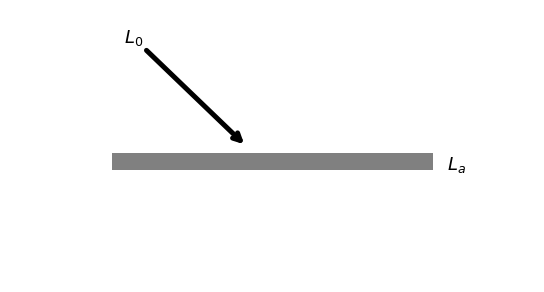

In [64]:
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(8,4.5))
x = np.linspace(0,1)
ax1 = fig.add_subplot(111)

ax1.annotate(r"$L_0$", xy=(0.45, 0.5), xytext=(0.22, 0.87),arrowprops=dict(arrowstyle="->",alpha=1,lw=5,color='k'))
#ax1.annotate(r"$I_r$", xy=(0.55, 0.5), xytext=(0.8, 0.87),arrowprops=dict(arrowstyle="<-",alpha=1,lw=5,color='k'))
#ax1.annotate(r"$I_t$", xy=(0.55, 0.37), xytext=(0.8, 0.),arrowprops=dict(arrowstyle="<-",alpha=1,lw=5,color='k'))
ax1.annotate(r"$L_a$", xy=(0.70, 0.44), xytext=(0.83, 0.415),arrowprops=dict(arrowstyle="-",alpha=1,lw=0,color='k'))

plt.yticks([], [])
plt.xticks([], [])

rect2 = patches.Rectangle((0.2,0.42),0.60,0.05,linewidth=1,edgecolor='grey',facecolor='grey', lw=3)
ax1.add_artist(rect2)

plt.tight_layout()
ax1.axis('off')
plt.savefig("fig:absorcion.png",dpi=300,transparent=False)
plt.show()


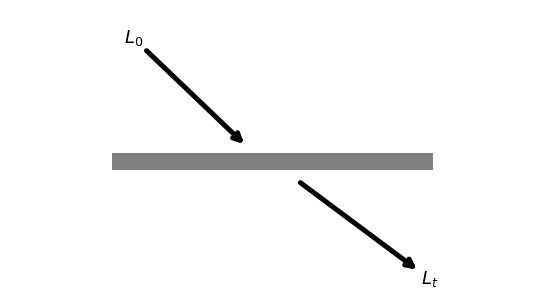

In [63]:
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(8,4.5))
x = np.linspace(0,1)
ax1 = fig.add_subplot(111)

ax1.annotate(r"$L_0$", xy=(0.45, 0.5), xytext=(0.22, 0.87),arrowprops=dict(arrowstyle="->",alpha=1,lw=5,color='k'))
ax1.annotate(r"$L_t$", xy=(0.55, 0.37), xytext=(0.78, 0.),arrowprops=dict(arrowstyle="<-",alpha=1,lw=5,color='k'))

plt.yticks([], [])
plt.xticks([], [])

rect2 = patches.Rectangle((0.2,0.42),0.60,0.05,linewidth=1,edgecolor='grey',facecolor='grey', lw=3)
ax1.add_artist(rect2)

plt.tight_layout()
ax1.axis('off')
plt.savefig("fig:transmision.png",dpi=300,transparent=False)
plt.show()


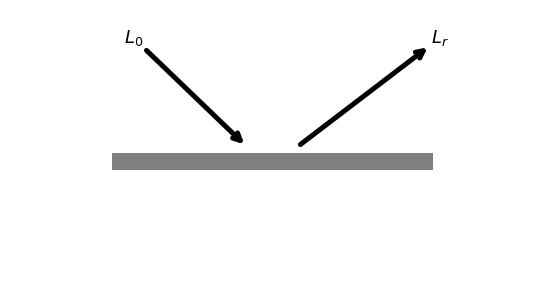

In [59]:
plt.rcParams['axes.facecolor']='#ffffff'
plt.rcParams['savefig.facecolor']='#ffffff'

plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(8,4.5))
x = np.linspace(0,1)
ax1 = fig.add_subplot(111)

ax1.annotate(r"$L_0$", xy=(0.45, 0.5), xytext=(0.22, 0.87),arrowprops=dict(arrowstyle="->",alpha=1,lw=5,color='k'))
ax1.annotate(r"$L_r$", xy=(0.55, 0.5), xytext=(0.8, 0.87),arrowprops=dict(arrowstyle="<-",alpha=1,lw=5,color='k'))

plt.yticks([], [])
plt.xticks([], [])

rect2 = patches.Rectangle((0.2,0.42),0.60,0.05,linewidth=1,edgecolor='grey',facecolor='grey', lw=3)
ax1.add_artist(rect2)

plt.tight_layout()
ax1.axis('off')
plt.savefig("fig:refleccion.png",dpi=300,transparent=False)
plt.show()
